In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Part3 - vehicle.csv')

In [3]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['class'] = labelencoder.fit_transform(df['class'])
df['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

In [6]:
# import seaborn as sns
# sns.pairplot(df,diag_kind='kde',hue='class')

In [7]:
missing_values_cols=df.columns[df.isnull().any()]
# Number of missing values in each column
df[missing_values_cols].isnull().sum()

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [8]:
df[df.isnull().any(axis=1)][missing_values_cols].head()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
5,NaN,106.0,172.0,50.0,255.0,26.0,28.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0
9,44.0,98.0,NaN,62.0,183.0,36.0,22.0,202.0,505.0,152.0,64.0,4.0,14.0,195.0
19,56.0,100.0,215.0,NaN,208.0,32.0,24.0,227.0,651.0,223.0,74.0,6.0,5.0,186.0
35,46.0,NaN,172.0,67.0,157.0,43.0,20.0,170.0,363.0,184.0,67.0,17.0,7.0,192.0
66,43.0,68.0,125.0,57.0,149.0,46.0,19.0,169.0,323.0,172.0,NaN,NaN,18.0,179.0


In [9]:
df[df.isnull().any(axis=1)][missing_values_cols].shape

(33, 14)

In [10]:
df[df['circularity'].isnull()][missing_values_cols]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
5,NaN,106.0,172.0,50.0,255.0,26.0,28.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0
105,NaN,103.0,202.0,64.0,220.0,30.0,25.0,NaN,711.0,214.0,73.0,11.0,NaN,188.0
118,NaN,NaN,128.0,56.0,150.0,46.0,19.0,168.0,324.0,173.0,82.0,9.0,14.0,180.0
266,NaN,65.0,116.0,53.0,152.0,45.0,19.0,175.0,335.0,NaN,85.0,5.0,4.0,179.0
396,NaN,106.0,177.0,51.0,256.0,26.0,28.0,285.0,966.0,261.0,87.0,11.0,2.0,182.0


In [11]:
df.drop([105,118,266],inplace=True)
print(df.loc[5]['class'],df.loc[396]['class'])
m0=df['circularity'][df['class']==0].median()


0.0 0.0


In [12]:
df['circularity'].fillna(m0, inplace=True)

In [13]:
df[df['distance_circularity'].isnull()][missing_values_cols]
print(df.loc[35]['class'],df.loc[319]['class'])
m1=df['distance_circularity'][df['class']==2].median()
m2=df['distance_circularity'][df['class']==0].median()
print(m1,m2)

2.0 0.0
75.0 72.5


In [14]:
df.loc[35]=df.loc[35].replace(np.nan,m1)
df.loc[319]=df.loc[319].replace(np.nan,m2)

In [15]:
df[df['radius_ratio'].isnull()][missing_values_cols]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
9,44.0,98.0,NaN,62.0,183.0,36.0,22.0,202.0,505.0,152.0,64.0,4.0,14.0,195.0
78,52.0,94.0,NaN,66.0,208.0,31.0,24.0,227.0,666.0,218.0,76.0,11.0,4.0,193.0
159,45.0,75.0,NaN,57.0,150.0,44.0,19.0,170.0,335.0,180.0,66.0,16.0,2.0,193.0
287,43.0,84.0,NaN,55.0,154.0,44.0,19.0,174.0,350.0,164.0,73.0,6.0,2.0,185.0
345,54.0,106.0,NaN,57.0,236.0,28.0,26.0,256.0,833.0,253.0,81.0,6.0,14.0,185.0
467,54.0,104.0,NaN,58.0,215.0,31.0,24.0,221.0,682.0,222.0,75.0,13.0,23.0,186.0


In [16]:
df[df['radius_ratio'].isnull()][missing_values_cols]
print(df.loc[9]['class'],df.loc[78]['class'],df.loc[159]['class'],df.loc[287]['class'],df.loc[345]['class'],df.loc[467]['class'])
m1=df['radius_ratio'][df['class']==0].median()
m2=df['radius_ratio'][df['class']==1].median()
m3=df['radius_ratio'][df['class']==2].median()
print(m1,m2,m3)

1.0 0.0 1.0 2.0 0.0 1.0
168.5 186.0 144.0


In [17]:
df.loc[39]=df.loc[39].replace(np.nan,m1)
df.loc[78]=df.loc[78].replace(np.nan,m0)
df.loc[159]=df.loc[159].replace(np.nan,m1)
df.loc[287]=df.loc[287].replace(np.nan,m2)
df.loc[345]=df.loc[345].replace(np.nan,m0)
df.loc[467]=df.loc[467].replace(np.nan,m2)
df.loc[9]=df.loc[9].replace(np.nan,m1)

In [18]:
df[df['pr.axis_aspect_ratio'].isnull()][missing_values_cols]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
19,56.0,100.0,215.0,NaN,208.0,32.0,24.0,227.0,651.0,223.0,74.0,6.0,5.0,186.0
222,50.0,81.0,197.0,NaN,186.0,34.0,22.0,206.0,531.0,198.0,74.0,NaN,1.0,197.0


In [19]:
df.drop(222, inplace=True)

In [20]:
df.loc[19]['class']
m1=df['pr.axis_aspect_ratio'][df['class']==1].median()


In [21]:
df.loc[19]=df.loc[19].replace(np.nan,m1)

In [22]:
df[df['scatter_ratio'].isnull()][missing_values_cols].drop(249,inplace=True)

In [23]:
df[df['pr.axis_rectangularity'].isnull()][missing_values_cols]

print(df.loc[70]['class'],df.loc[237]['class'],df.loc[273]['class'])
m0=df['pr.axis_rectangularity'][df['class']==0].median()
m1=df['pr.axis_rectangularity'][df['class']==1].median()
m2=df['pr.axis_rectangularity'][df['class']==2].median()
print(m0,m1,m2)

1.0 0.0 2.0
19.0 22.0 18.0


In [24]:
df.loc[70]=df.loc[70].replace(np.nan,m1)
df.loc[237]=df.loc[237].replace(np.nan,m0)
df.loc[273]=df.loc[273].replace(np.nan,m2)

In [25]:
df[df['elongatedness'].isnull()][missing_values_cols]
print(df.loc[215]['class'])
m0=df['elongatedness'][df['class']==1].median()
print(m0)
df.loc[215]=df.loc[215].replace(np.nan,m0)

1.0
36.0


In [26]:
df[df['scaled_variance'].isnull()][missing_values_cols]
print(df.loc[372]['class'],df.loc[522]['class'])
m2=df['scaled_variance'][df['class']==2].median()
m1=df['scaled_variance'][df['class']==1].median()
df.loc[372]=df.loc[372].replace(np.nan,m2)
df.loc[522]=df.loc[522].replace(np.nan,m1)

2.0 1.0


In [27]:
df[df['scaled_variance.1'].isnull()][missing_values_cols]
print(df.loc[308]['class'],df.loc[496]['class'])
m1=df['scaled_variance.1'][df['class']==1].median()
print(m1)
df.loc[[308,496]]=df.loc[[308,496]].replace(np.nan,m1)

1.0 1.0
511.5


In [28]:
df[df['scaled_radius_of_gyration'].isnull()][missing_values_cols]
print(df.loc[207]['class'],df.loc[372]['class'])
m0=df['scaled_radius_of_gyration'][df['class']==0].median()
print(m0)
df.drop([372],inplace=True)
df.loc[207]=df.loc[207].replace(np.nan,m0)

0.0 2.0
176.0


In [29]:
df[df['scaled_radius_of_gyration.1'].isnull()][missing_values_cols]
print(df.loc[77]['class'],df.loc[192]['class'],df.loc[329]['class'])
m1=df['scaled_radius_of_gyration'][df['class']==1].median()
print(m1)
# df.drop([67],inplace=True)
df.loc[[77,192,329]]=df.loc[[77,192,329]].replace(np.nan,m1)

1.0 1.0 1.0
181.5


In [30]:
df[df['skewness_about'].isnull()][missing_values_cols]
print(df.loc[66]['class'],df.loc[141]['class'],df.loc[177]['class'],df.loc[249]['class'],df.loc[285]['class'])
m0=df['skewness_about'][df['class']==0].median()
m1=df['skewness_about'][df['class']==1].median()
df.loc[[66,141,177]]=df.loc[[66,141,177]].replace(np.nan,m0)
df.loc[[249,285]]=df.loc[[249,285]].replace(np.nan,m1)

0.0 0.0 0.0 1.0 1.0


In [31]:
df[df['skewness_about.2'].isnull()][missing_values_cols]
print(df.loc[419]['class'])
m1=df['skewness_about.2'][df['class']==1].median()
df.loc[419]=df.loc[419].replace(np.nan,m1)

1.0


In [32]:
df.shape

(841, 19)

In [33]:
from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random number seeding for reapeatability of the code
df_train, df_test= train_test_split(df, test_size=test_size, random_state=seed)
df_train.shape, df_test.shape

((588, 19), (253, 19))

In [34]:
X_train=df_train.drop(labels='class', axis=1)
y_train=df_train['class']
X_test=df_test.drop(labels='class', axis=1)
y_test=df_test['class']
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((588, 18), (588,), (253, 18), (253,))

In [35]:
df[missing_values_cols].isnull().sum()

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
dtype: int64

In [57]:
from sklearn import svm
clf = svm.SVC(gamma=1, kernel='rbf',C=0.1) 
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
clf.score(X_train,y_train)
clf.score(X_test,y_test)

0.5059288537549407

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
#Transform X_test ( with same fit as train) to prevent data leak
X_test_std=sc.transform(X_test)
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00170358  0.69486224  0.79149622  0.63302804  0.05071752  0.10207102
   0.80822905 -0.79060228  0.8177979   0.68448107  0.7554599   0.82164641
   0.5916591  -0.20392137  0.26040588  0.17230488  0.31247081  0.36478771]
 [ 0.69486224  1.00170358  0.80076956  0.58365841  0.12203679  0.21894484
   0.8507371  -0.8266878   0.85260159  0.96329023  0.79424052  0.84553157
   0.92318339 -0.00917149  0.17999947  0.02405742 -0.08469544  0.06448299]
 [ 0.79149622  0.80076956  1.00170358  0.72296915  0.12773505  0.21898327
   0.90308074 -0.91541528  0.8972838   0.78071637  0.85495517  0.8897449
   0.71018017 -0.19013108  0.14769541  0.28046078  0.16711664  0.34279482]
 [ 0.63302804  0.58365841  0.72296915  1.00170358  0.65501518  0.47484433
   0.66436282 -0.72969341  0.64017474  0.53885843  0.74639007  0.6507089
   0.48859238 -0.11491216  0.05467112  0.18655534  0.3798357   0.47759243]
 [ 0.05071752  0.12203679  0.12773505  0.65501518  1.00170358  0.71168336
   0.05699406 

In [62]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.76931770e-01  1.14113799e-01  1.35221366e-01 -8.98643667e-02
  -7.18213013e-02 -2.37469484e-01  2.25234805e-01  3.51009074e-01
   7.20688213e-01 -1.35263903e-01 -2.53524669e-01 -1.11448823e-01
   3.67028781e-02 -1.68987644e-01  1.30704377e-03 -1.01649014e-02
  -6.16179060e-02  1.57836834e-02]
 [-2.96329417e-01 -1.28046430e-01  1.45558035e-03 -1.68995894e-01
   9.94012860e-02  2.78803557e-01  1.23004736e-01 -2.89744190e-01
   1.27510369e-01 -5.67015312e-02  9.12585366e-02  4.72367985e-02
  -1.38374724e-01 -1.43001236e-01  5.99229483e-02  1.71906433e-02
   5.55996397e-01  5.45791879e-01]
 [-3.06563714e-01  6.86235831e-02  5.78483594e-02  5.73883629e-02
  -4.53586037e-02  8.10127776e-02  3.17908083e-02  1.25349526e-01
  -4.05567215e-01 -4.43593831e-01 -4.04390650e-01 -4.55703767e-01
  -2.61983397e-01  1.88688407e-01 -2.15443036e-02 -2.86943280e-02
   1.40551459e-01 -1.07643765e-01]
 [-2.51082884e-01  2.39150326e-01 -2.73146439e-01  3.79618561e-02
   3.65590325e-02 -

In [63]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 51.69195716  66.83587841  78.09225016  84.71116241  89.60485324
  92.79000678  94.81790691  96.51116125  97.59498736  98.34092766
  98.82103869  99.17666838  99.4468234   99.64437629  99.77773534
  99.89498997  99.97329753 100.        ]


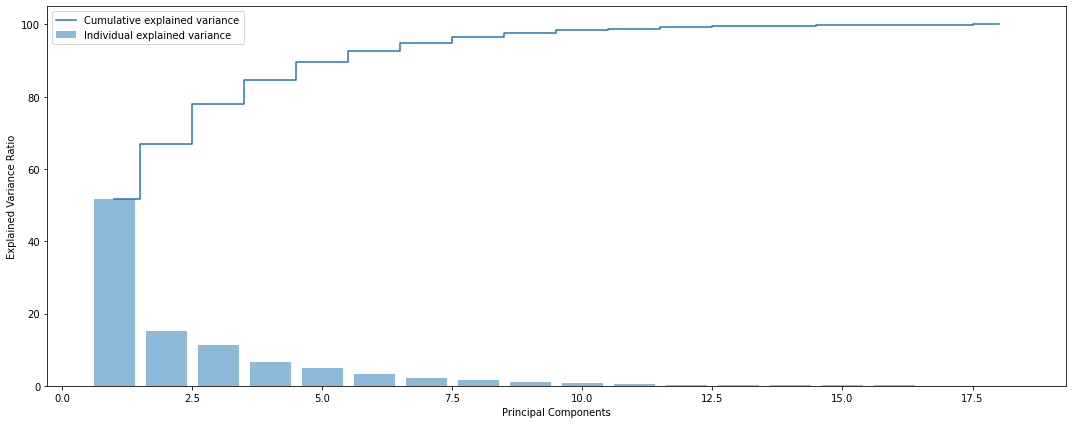

In [64]:
plt.figure(figsize=(15 , 6))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [67]:
eig_pairs = [(eig_vals[index], eig_vecs[index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue by default take first field for sorting
eig_pairs.sort(reverse=True)


# Note: always form pair of eigen vector and values  first before sorting...

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eig_vals))]

In [68]:
P_reduce = np.array(eigvectors_sorted[0:8]).transpose()   # Selecting first 8 eigen vector out if 18

Proj_train_data = np.dot(X_train_std,P_reduce)   # projecting training data onto the eight eigen vectors

Proj_test_data = np.dot(X_test_std,P_reduce)    # projecting test data onto the eight eigen vectors

In [69]:
Proj_train_data.shape,y_train.shape,Proj_test_data.shape,y_test.shape

((588, 8), (588,), (253, 8), (253,))

In [52]:
pca3 = PCA(n_components=3)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.27376398  0.29438541  0.29717997  0.259626    0.07931091  0.09480754
   0.31744041 -0.31559067  0.31528233  0.28255313  0.31099132  0.31582826
   0.27374489 -0.01856796  0.03886579  0.05858455  0.02598915  0.06868483
  -0.07553314]
 [-0.13102739  0.11770575 -0.07190964 -0.22262038 -0.18318127 -0.07438968
   0.05426878  0.0030298   0.06732029  0.09915696  0.05279574  0.06113267
   0.20950374  0.39875027 -0.06355951 -0.13144827 -0.53877539 -0.55417605
  -0.17237192]
 [-0.13420924  0.00301888 -0.06081883  0.24953541  0.61463761  0.59732612
  -0.09133919  0.06236549 -0.1025279   0.0127481   0.05692921 -0.10431551
   0.00607062  0.32999175 -0.11259281 -0.11849568 -0.07281224 -0.03197652
   0.04930198]]
[0.49230195 0.14905344 0.09762346]


In [70]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(Proj_train_data, y_train)

prediction = svc_model.predict(Proj_test_data)
# check the accuracy on the training set
print(svc_model.score(Proj_train_data, y_train))
print(svc_model.score(Proj_test_data, y_test))

0.8367346938775511
0.8379446640316206


In [73]:
svc_model = SVC(kernel='rbf')
svc_model.fit(Proj_train_data, y_train)
prediction = svc_model.predict(Proj_test_data)
print(svc_model.score(Proj_train_data, y_train))
print(svc_model.score(Proj_test_data, y_test))

0.9251700680272109
0.8774703557312253
